In [1]:
import pandas as pd
from datetime import datetime, timedelta
import random
import json

Generate sample data

In [5]:

# Generate sample data
random.seed(42)

def generate_random_timestamp():
    return datetime(2023, 1, 1) + timedelta(minutes=random.randint(0, 60*24*30))

data = []

for _ in range(1000):
    message = {
        'user': f'user_{random.randint(1, 20)}',
        'reply_count': random.randint(0, 10),
        'mention_count': random.randint(0, 5),
        'message_count': 1,
        'reaction_count': random.randint(0, 5),
        'message': f'Message {random.randint(1, 100)}',
        'replies': random.randint(0, 10),
        'reactions': random.randint(0, 5),
        'mentions': random.randint(0, 5),
        'channel': f'channel_{random.randint(1, 5)}',
        'timestamp': generate_random_timestamp(),
        'first_reply_timestamp': generate_random_timestamp()  # Assuming this is available in your data
    }
    data.append(message)

# Create a DataFrame
df = pd.DataFrame(data)

Step 2: Top and Bottom 10 Users

In [6]:
# Top and bottom 10 users by reply, mention, message, and reaction counts
top_reply_users = df.groupby('user')['reply_count'].sum().nlargest(10)
bottom_reply_users = df.groupby('user')['reply_count'].sum().nsmallest(10)

top_mention_users = df.groupby('user')['mention_count'].sum().nlargest(10)
bottom_mention_users = df.groupby('user')['mention_count'].sum().nsmallest(10)

top_message_users = df['user'].value_counts().nlargest(10)
bottom_message_users = df['user'].value_counts().nsmallest(10)

top_reaction_users = df.groupby('user')['reaction_count'].sum().nlargest(10)
bottom_reaction_users = df.groupby('user')['reaction_count'].sum().nsmallest(10)

Step 3: Top 10 Messages

In [7]:
# Top 10 messages by replies, reactions, and mentions
top_replies_messages = df.nlargest(10, 'replies')
top_reactions_messages = df.nlargest(10, 'reactions')
top_mentions_messages = df.nlargest(10, 'mentions')


Step 4: Channel Activity

In [8]:
# Channel with the highest activity based on the specified scatter plot criteria
channel_activity = df.groupby('channel').agg({
    'message_count': 'sum',
    'reply_count': 'sum',
    'reaction_count': 'sum'
})
channel_activity['activity_score'] = channel_activity['message_count'] + channel_activity['reply_count'] + channel_activity['reaction_count']
top_channel = channel_activity.nlargest(1, 'activity_score').index[0]


Step 5: Fraction of Messages Replied Within the First 5 Mins

In [9]:
# Calculate time difference between message timestamp and the first reply timestamp
df['reply_time_difference'] = (df['first_reply_timestamp'] - df['timestamp']).dt.total_seconds()

# Fraction of messages replied within the first 5 mins
fraction_replied_within_5mins = (df['reply_time_difference'] <= 300).mean()


Step 6: Scatter Plot

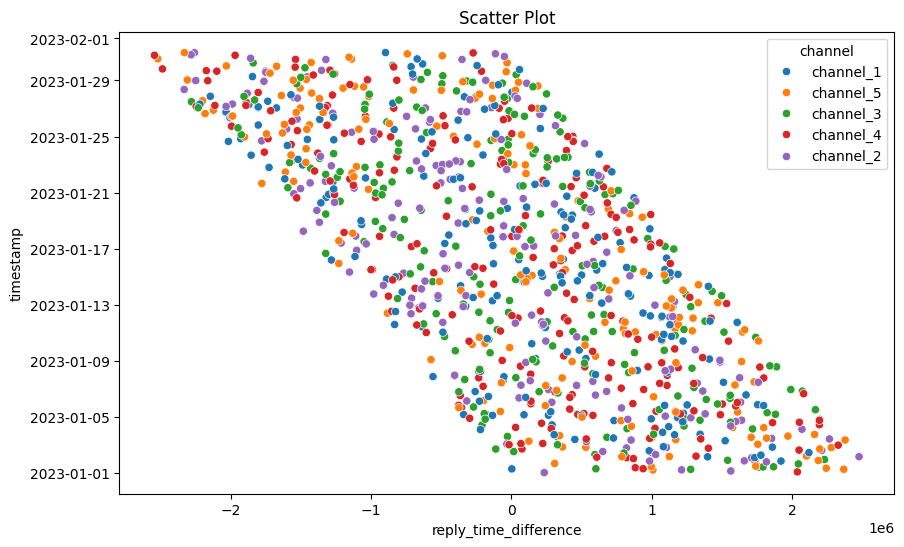

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='reply_time_difference', y='timestamp', hue='channel', data=df)
plt.title('Scatter Plot')
plt.show()
